In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return np.maximum(x,0)

def dx(x,w,b1,b2):
    return -x + w*relu(x+b1)+b2

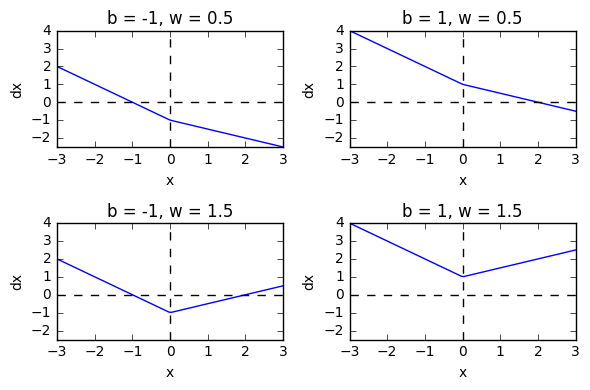

In [5]:
'''plot dx in four qualitative regimes b>(<) 0 and w>(<) 1'''

xx = np.linspace(-3,3,100)
count = 0

b=[-1,1]
w=[.5,1.5]

for ii in range(2):
    for jj in range(2):
        count+=1
        plt.subplot(2,2,count)
        plt.plot(xx,dx(xx,w[ii],0,b[jj]))
#         plt.grid()
        plt.title('b = {}, w = {}'.format(b[jj],w[ii]))
        plt.ylim([-2.5,4])
        plt.plot([0,0],[-2.5,4],'--k')
        plt.plot([-3,3],[0,0],'--k')
        plt.ylabel('dx')
        plt.xlabel('x')

plt.tight_layout()
plt.show()

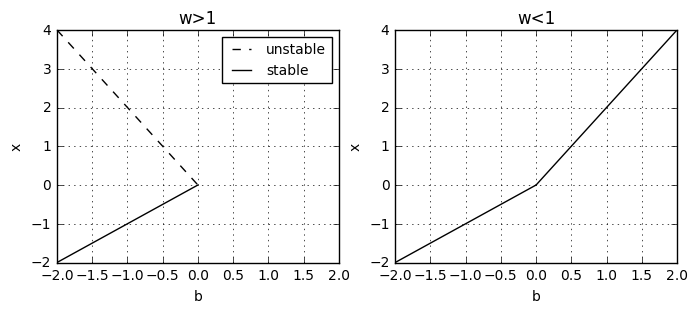

In [11]:
''' plot bifurcation diagram for b'''

plt.figure(figsize=(8,3))

plt.subplot(1,2,1)

w = 1.5

bb = np.linspace(-2,0,100)

plt.plot(bb,-bb/(w-1),'k--')
plt.plot(bb,bb,'k')
plt.grid('on')
plt.xlim((-2,2))
plt.ylim((-2,4))
plt.xlabel('b')
plt.ylabel('x')
plt.title('w>1')

plt.legend(['unstable','stable'],fontsize=10)

plt.subplot(1,2,2)
w = .5

bb = np.linspace(0,2,100)

plt.plot(bb,-bb/(w-1),'k')
# plt.plot(bb,bb)
plt.grid('on')
plt.xlim((-2,2))
plt.ylim((-2,4))
plt.xlabel('b')
plt.ylabel('x')
plt.title('w<1 : b>0')


bb = np.linspace(-2,0,100)

# plt.plot(bb,-bb/(w-1))
plt.plot(bb,bb,'k')
plt.grid('on')
plt.xlim((-2,2))
plt.ylim((-2,4))
plt.xlabel('b')
plt.ylabel('x')
plt.title('w<1')

plt.show()

/Users/daniel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide
/Users/daniel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide


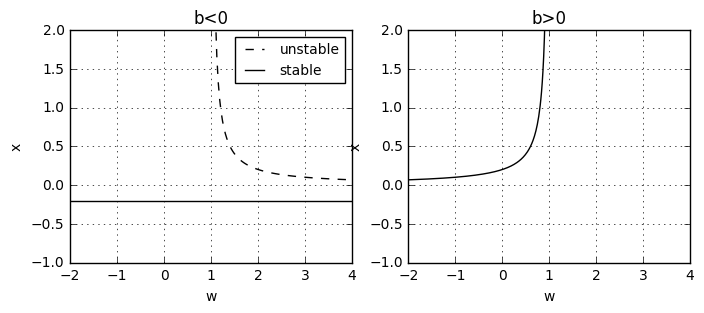

In [22]:
''' plot bifurcation diagram for w'''

plt.figure(figsize=(8,3))

plt.subplot(1,2,1)

b = -.2

ww = np.linspace(1,4,100)
ww2 = np.linspace(-2,4,200)

# bb = np.linspace(-2,0,100)

plt.plot(ww,-b/(ww-1),'k--')
plt.plot(ww2,np.ones_like(ww2)*b,'k')
plt.grid('on')
plt.xlim((-2,4))
plt.ylim((-1,2))
plt.xlabel('w')
plt.ylabel('x')
plt.title('b<0')

plt.legend(['unstable','stable'],fontsize=10)

plt.subplot(1,2,2)

b = .2

# ww = np.linspace(1,4,100)
ww = np.linspace(-2,1,200)

# bb = np.linspace(-2,0,100)

plt.plot(ww,-b/(ww-1),'k')
# plt.plot(ww2,np.ones_like(ww2)*b,'k')
plt.grid('on')
plt.xlim((-2,4))
plt.ylim((-1,2))
plt.xlabel('w')
plt.ylabel('x')
plt.title('b>0')

plt.show()

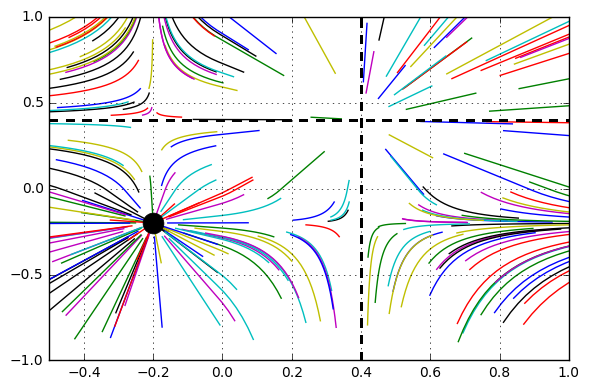

In [81]:
'''plot 2d system with W: w(ii)>1 and w(ij) = 0, and b<0'''

w = 1.5
b=-.2

B = np.ones([2,1])*b
W = np.eye(2)*w

alpha = .1
n_steps = 20

low = -.9 #.39
high = .9 #.41
n_reps = 200
x_inits = low+ (high-low)*np.random.rand(n_reps,2)

for ii in range(len(x_inits)):
    
#     plt.subplot(2,2,ii+1)
        
    x_init = x_inits[ii,:]
    x = np.zeros([2,n_steps])

    x[:,0] = x_init

    for ii in range(1,n_steps):
        x[:,ii] = (1-alpha)*x[:,ii-1] + alpha*(W.dot(relu(x[:,ii-1])) + B.flatten())

    plt.plot(x[0,:],x[1,:])
    plt.xlim([-.5,1])
    plt.ylim([-1,1])
    plt.plot([.4,.4],[-1,1],'k--')
    plt.plot([-1,1],[.4,.4],'k--')
    
    plt.grid('on')
    
plt.plot(b,b,'ok',markersize=15)
    
plt.tight_layout()
plt.show()